# LFD


#### github:https://github.com/Morwamanku/Assignment2Data/blob/main/LD%20Assignment%202/LD%20Assignment2.ipynb
#### data description: 
In my analysis of Adidas sales data in the US using Jupyter Notebook, I'm leveraging Python libraries like Pandas and NumPy to perform descriptive statistics. After importing the sales dataset, I'm exploring key metrics such as mean, median, standard deviation, and quartiles to understand the central tendencies and variability of the sales figures. By visualizing the data using Matplotlib or Seaborn, I'm gaining deeper insights into sales trends over time and across different regions or product categories. Through this process, I'm able to uncover patterns and extract valuable insights to inform decision-making and strategy within the context of Adidas sales in the 

In [13]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#Reading File
df= pd.read_excel("AdidasUSSalesDatasets3.xlsx")

Summary of the dataset

In [15]:
df.head()

,Retailer,Retailer ID,Invoice Date,Reggion,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Walmart,1128299,2021-06-17,Southeast,Florida,Orlando,Women's Apparel,$103.00,218,2.245,"$1,257",Online
1,West Gear,1128299,2021-07-16,South,Louisiana,New Orleans,Women's Apparel,$103.00,163,1.679,$806,Online
2,Sports Direct,1197831,2021-08-25,South,Alabama,Birmingham,Men's Street Footwear,$10.00,700,7.000,"$3,150",Outlet
3,Sports Direct,1197831,2021-08-27,South,Alabama,Birmingham,Women's Street Footwear,$15.00,575,8.625,"$3,881",Outlet
4,Sports Direct,1197831,2021-08-21,South,Alabama,Birmingham,Women's Street Footwear,$15.00,475,7.125,"$3,206",Outlet


# The dataset shall be cleaned through the following processes:
1. Checking the number of columns
2. Changing misplet column names to the correct names
3. Checking for missing values
4. Checking for duplicate values
5. Checking for outlines

In [16]:
# Rename the column "Reggion" to "Region"
df.rename(columns={"Reggion":"Region"}, inplace=True)

In [17]:
#Change error of "Men's aparel" to "Men's Apparel"
df['Product'] = df['Product'].replace({"Men's aparel": "Men's Apparel"})

In [18]:
# Checking for the missing values
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      2
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
dtype: int64

In [19]:
# Dropping the missing values of other columns
df1 = df.dropna()
df1.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
dtype: int64

In [20]:
df1.duplicated().sum()

1

In [21]:
df2= df1.drop_duplicates()
df2.duplicated().sum()

0

In [22]:
# Saving the new dataset into a csv file
df2.to_excel("Cleaned_AdidasUSSalesDatasets3.xlsx")

# Graphs
1. Total Units Sold by Product bar graph
2. Histogram of Units sold
3. Box plot of units sold by sales method
4. Units sold by city pie chart
5. Total sales by retailer
6. Contribution of Different Products to Total Sales for Each Retailer

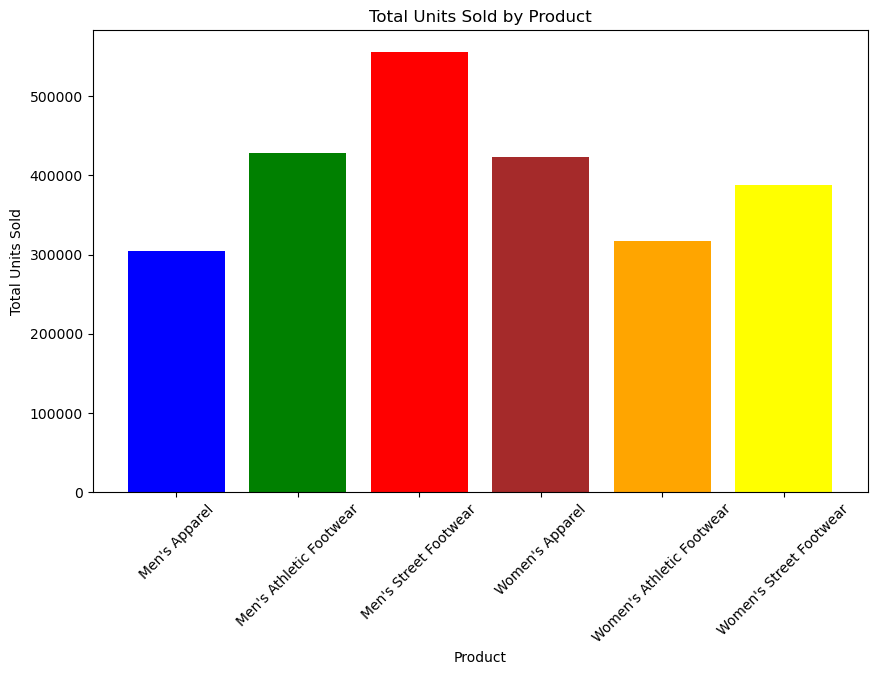

In [23]:
# Aggregating total units sold by product
total_units_by_product = df2.groupby('Product')['Units Sold'].sum().reset_index()

# Define colors for each bar
colors = ['blue', 'green', 'red','brown', 'orange','yellow','pink']

# Plotting bar graph
plt.figure(figsize=(10, 6))
plt.bar(total_units_by_product['Product'], total_units_by_product['Units Sold'], color=colors)
plt.title('Total Units Sold by Product')
plt.xlabel('Product')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

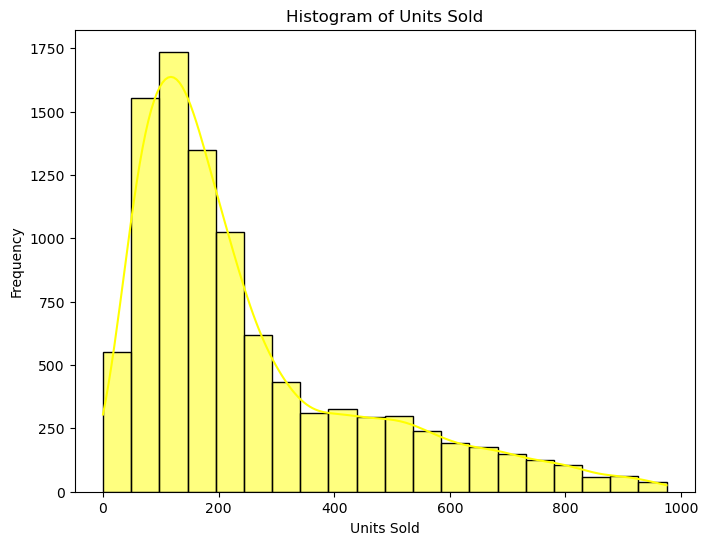

In [24]:
total_units_sold = df2.groupby('Sales Method')['Units Sold'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.histplot(df['Units Sold'], bins=20, kde=True, color='yellow')  # Setting the color to yellow
plt.title('Histogram of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()


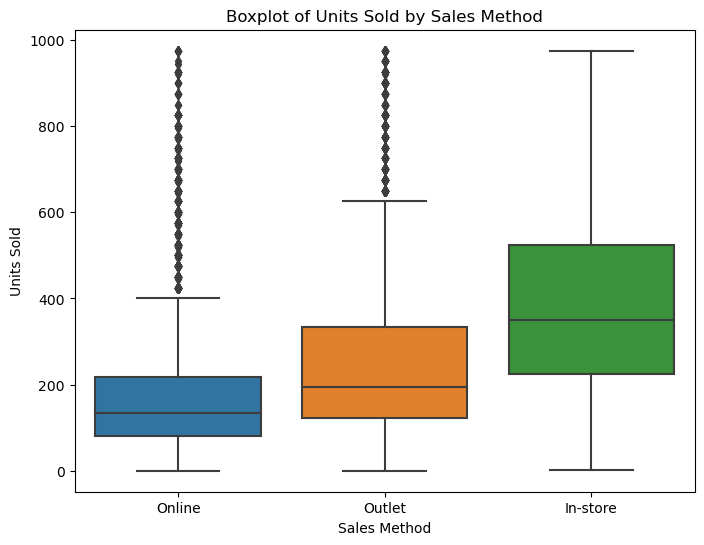

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sales Method', y='Units Sold', data=df2)
plt.title('Boxplot of Units Sold by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Units Sold')
plt.show()

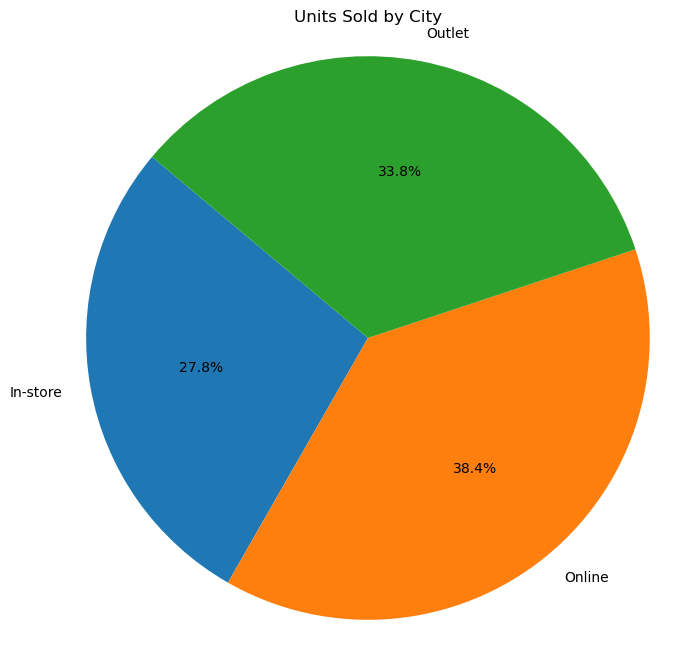

In [26]:


# Group data by city and sum units sold
city_units = df2.groupby('Sales Method')['Units Sold'].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(city_units, labels=city_units.index, autopct='%1.1f%%', startangle=140)
plt.title('Units Sold by City')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

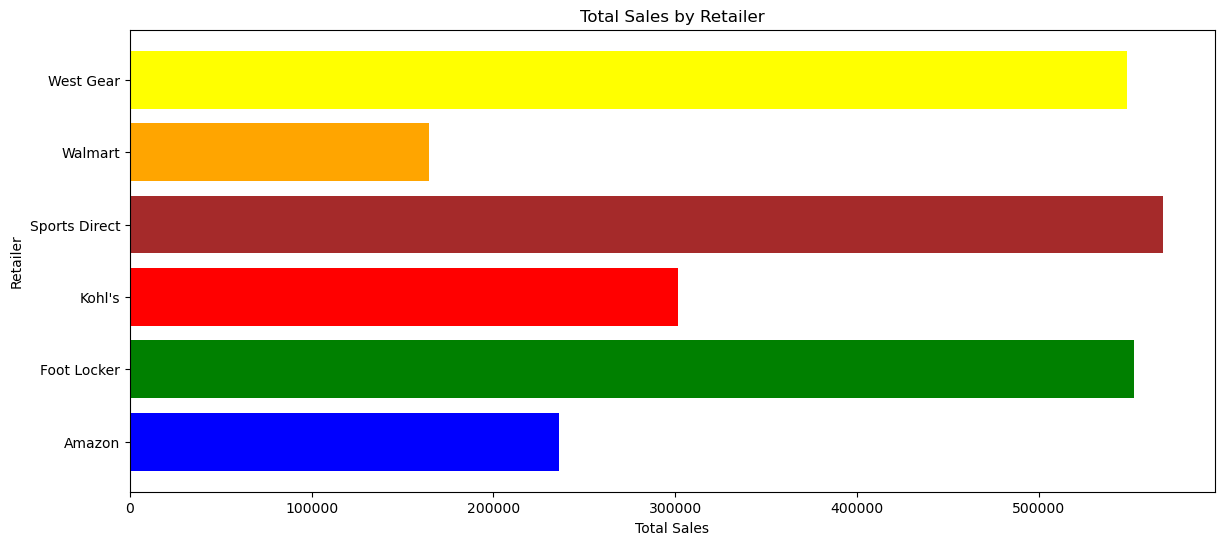

In [27]:


plt.figure(figsize=(14, 6))

total_sales_by_retailer= df2.groupby('Retailer')['Total Sales'].sum().reset_index()
# Define colors for each bar
colors = ['blue', 'green', 'red', 'brown', 'orange', 'yellow', 'pink']

# Plotting side-by-side bar charts
plt.barh(total_sales_by_retailer['Retailer'], total_sales_by_retailer['Total Sales'], color=colors)

plt.title('Total Sales by Retailer')
plt.xlabel('Total Sales')
plt.ylabel('Retailer')

plt.show()


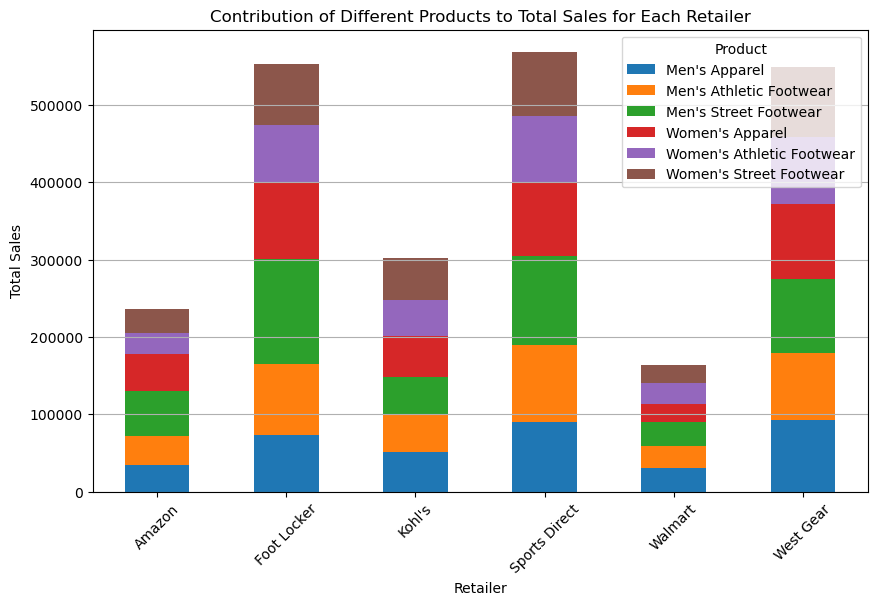

In [28]:
# Group by retailer and product, then pivot the data
df_pivot = df2.pivot_table(index='Retailer', columns='Product', values='Total Sales', aggfunc='sum', fill_value=0)

# Plot stacked bar plot
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Contribution of Different Products to Total Sales for Each Retailer')
plt.xlabel('Retailer')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Product')
plt.grid(axis='y')
plt.show()

# Descriptive statistics for 'Units Sold'

1. calculate the Range
2. calculate the Interquartile Range (IQR)
3. calculate the Coefficient of Variation (CV)
4. calculate the Skewness
5. calculate the Kurtosis
6. calculate the sum
7. calculate the mean
8. calculate the median
9. calculate the mode
10. calculate the variance
11. calculate the standard deviation
12. calculate the minimum
13. calculate the maximum
14. calculate the quartiles



In [29]:
import numpy as np
from scipy.stats import skew, kurtosis

def mean(data):
    return sum(data) / len(data)

#function to calculate the median
def median(data):
    sorted_data = sorted(data)
    n = len(data)
    if n % 2 == 0:
        return (sorted_data[n//2 - 1] + sorted_data[n//2]) / 2
    else:
        return sorted_data[n//2]

#function to calculate the mode
def mode(data):
    frequency = {}
    for value in data:
        frequency[value] = frequency.get(value, 0) + 1
    max_frequency = max(frequency.values())
    mode_values = [key for key, val in frequency.items() if val == max_frequency]
    return mode_values

#function to calculate the variance
def variance(data):
    mu = mean(data)
    return sum((x - mu) ** 2 for x in data) / len(data)

#function to calculate the standard deviation
def std_dev(data):
    return variance(data) ** 0.5

#function to calculate the minimum
def minimum(data):
    return min(data)

#function to calculate the maximum
def maximum(data):
    return max(data)

#function to calculate quartiles
def quartiles(data):
    sorted_data = sorted(data)
    n = len(data)
    q1 = median(sorted_data[:n//2])
    q2 = median(sorted_data)
    q3 = median(sorted_data[(n+1)//2:])
    return q1, q2, q3

# Calculate Range
def data_range(data):
    return max(data) - min(data)

# Calculate Interquartile Range (IQR)
def iqr(data):
    q1, _, q3 = np.percentile(data, [25, 50, 75])
    return q3 - q1

# Calculate Coefficient of Variation (CV)
def cv(data):
    return (std_dev(data) / mean(data)) * 100

# Calculate Skewness
def calc_skewness(data):
    return skew(data)

# Calculate Kurtosis
def calc_kurtosis(data):
    return kurtosis(data)

#Descriptive statistics for 'Units Sold' column
units_sold = df2['Units Sold']

#Calculate descriptive statistics
print("1. Range:", data_range(units_sold))
print("2. Interquartile Range (IQR):", iqr(units_sold))
print("3. Coefficient of Variation (CV):", cv(units_sold))
print("4. Skewness:", calc_skewness(units_sold))
print("5. Kurtosis:", calc_kurtosis(units_sold))
print("6. Sum:", sum(units_sold))
print("7. Mean:", mean(units_sold))
print("8. Median:", median(units_sold))
print("9. Mode:", mode(units_sold))
print("10. Variance:", variance(units_sold))
print("11. Standard Deviation:", std_dev(units_sold))
print("12. Minimum:", minimum(units_sold))
print("13. Maximum:", maximum(units_sold))
print("14. Quartiles:", quartiles(units_sold))


1. Range: 975
2. Interquartile Range (IQR): 220.0
3. Coefficient of Variation (CV): 82.0677260426127
4. Skewness: 1.3576076257598262
5. Kurtosis: 1.1621651127932076
6. Sum: 2416944
7. Mean: 250.7463429816371
8. Median: 175
9. Mode: [225]
10. Variance: 42346.15819157467
11. Standard Deviation: 205.78182182003997
12. Minimum: 0
13. Maximum: 975
14. Quartiles: (105, 175, 325)


# Conclusions

### Sales Channels Analysis:
Adidas distributes their goods via a number of channels, such as Amazon, Foot Locker, Kohl's, Sports Direct, Walmart, and West Gear.
Sports Direct and Foot Locker appear to handle the majority of sales, with sizable internet sales as well.


### Product Category Analysis:

Men's apparel, men's athletic footwear, men's street footwear, women's apparel, women's athletic footwear, and women's street footwear are among the many products sold by Adidas.
Men's Street Footwear appears to be the most well-liked category among them all, over all sales channels.


### Sales Performance:

With the biggest total sales, Foot Locker and Sports Direct are performing particularly well in those channels.
An additional large portion of the overall revenue from all channels comes from online sales.
Regional Scope:

Adidas products are available for purchase in many different cities, with sales volumes differing throughout them.
The dataset offers a thorough understanding of how sales are distributed throughout various geographic areas.

### Descriptive Statistics Insights:

The range of units sold is relatively large, indicating a broad spectrum of demand.
The coefficient of variation suggests a moderate level of variability in sales.
Skewness and kurtosis indicate that the distribution of units sold is moderately skewed to the right and slightly leptokurtic, respectively.
The mean and median values provide insight into the central tendency of sales, with the median being lower than the mean, suggesting a right-skewed distribution.
The quartiles provide additional information about the spread of sales data.

### Recommendations:

Given the strong performance in channels like Foot Locker and Sports Direct, Adidas may consider further investment or marketing strategies to capitalize on this success.
Online sales appear to be a significant contributor to overall revenue, indicating the importance of maintaining a strong online presence and optimizing e-commerce platforms.
Continued monitoring of sales performance across different product categories and channels can help identify trends and areas for improvement.

# Reflections on your learnings between this assignment and the previous one


Using the Adidas US Sales Dataset, I compared my experiences with Python and Excel for data analysis jobs, and I found some interesting distinctions and new insights. When it comes to data analysis, Python is a more reliable and scalable environment than Excel. Although Excel has an easy-to-use interface for rapid computations and basic analysis, Python's tools, such Pandas, enable more sophisticated data manipulation, management of larger datasets, and task automation. Python is the best choice for projects needing a lot of data processing or statistical analysis because of its scripting capabilities, which provide more flexibility and repeatability. However, Excel shines in situations where simple computations or rapid exploratory data analysis are adequate, especially for people who are more accustomed to spreadsheet-based methods. After giving this project some thought, I would use Python instead of Excel to take advantage of its sophisticated data handling features and expedite the analysis process. To be more precise, I would utilise Python to conduct more thorough statistical analysis, provide visuals, and even create predictive models in order to extract useful information from the dataset.In addition, I understand that in order to fully utilise Python for data analysis jobs, I will need to improve my programming abilities, especially in areas like statistical modelling, machine learning, and data visualisation. Furthermore, developing a deeper comprehension of statistical ideas and procedures would improve my capacity to reliably analyse results and extract insightful information from the data. Overall, the switch from Excel to Python represents a move towards more complex and scalable data analysis techniques, highlighting the significance of ongoing education and skill development in the fields of statistics and programming.

